In [23]:
# importing Libraries
import ast
import pandas as pd 
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt
from adjustText import adjust_text

# Loading Dataset
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [24]:
df_DA_PL = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'Poland')].copy()

In [25]:
df_DA_PL = df_DA_PL.dropna(subset=['salary_year_avg'])
df_DA_PL_exploded = df_DA_PL.explode('job_skills')

df_DA_PL_exploded[['salary_year_avg', 'job_skills']].head()

,salary_year_avg,job_skills
1490,43200.0,gdpr
1490,43200.0,sap
1490,43200.0,powerpoint
1490,43200.0,excel
6567,56700.0,r


In [26]:
df_DA_skills = df_DA_PL_exploded.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by='count', ascending=False)

df_DA_skills = df_DA_skills.rename(columns={'count': 'skill_count', 'median': 'median_salary'})

df_DA_skills.head()

,skill_count,median_salary
job_skills,,
sql,26,102500.0
excel,16,74250.0
python,15,102500.0
tableau,13,111175.0
gcp,10,106837.5


In [27]:
DA_job_count = len(df_DA_PL)

df_DA_skills['skill_percent'] = df_DA_skills ['skill_count'] / DA_job_count * 100

skill_percent = 5

df_DA_skills_high_demand = df_DA_skills[df_DA_skills['skill_percent'] >= skill_percent]

df_DA_skills_high_demand

,skill_count,median_salary,skill_percent
job_skills,,,
sql,26,102500.00,60.465116
excel,16,74250.00,37.209302
python,15,102500.00,34.883721
tableau,13,111175.00,30.232558
gcp,10,106837.50,23.255814
power bi,8,82350.00,18.604651
spark,8,111175.00,18.604651
looker,6,111175.00,13.953488
windows,5,111175.00,11.627907


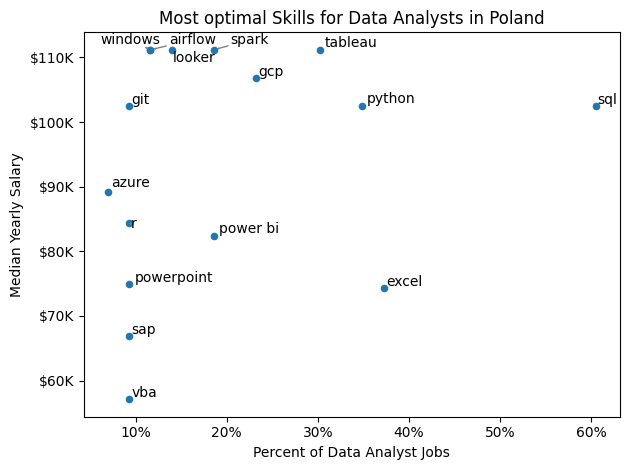

In [29]:
df_DA_skills_high_demand.plot(kind='scatter', x='skill_percent', y='median_salary')

texts = []
for i, txt in enumerate(df_DA_skills_high_demand.index):
    texts.append(plt.text(df_DA_skills_high_demand['skill_percent'].iloc[i], df_DA_skills_high_demand['median_salary'].iloc[i], txt))

#Adjust text to avoid overlap
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='grey'))

plt.xlabel('Percent of Data Analyst Jobs')
plt.ylabel('Median Yearly Salary')
plt.title('Most optimal Skills for Data Analysts in Poland')

from matplotlib.ticker import PercentFormatter
ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K'))
ax.xaxis.set_major_formatter(PercentFormatter(decimals=0))
plt.tight_layout()
plt.show()

In [32]:
df['job_type_skills'].head()

0                                                 None
1    {'analyst_tools': ['power bi', 'tableau'], 'pr...
2    {'analyst_tools': ['dax'], 'cloud': ['azure'],...
3    {'cloud': ['aws'], 'libraries': ['tensorflow',...
4    {'cloud': ['oracle', 'aws'], 'other': ['ansibl...
Name: job_type_skills, dtype: object

In [33]:

df_technology = df['job_type_skills'].copy()

# remove duplicates
df_technology = df_technology.drop_duplicates()

# remove NaN values
df_technology = df_technology.dropna()

# combine all dictionaries into one
technology_dict = {}
for row in df_technology:
    row_dict = ast.literal_eval(row)  # convert string to dictionary
    for key, value in row_dict.items():
        if key in technology_dict:  # if key already exists in technology_dict, add value to existing value
            technology_dict[key] += value
        else:                       # if key does not exist in technology_dict, add key and value
            technology_dict[key] = value

# remove duplicates by converting values to set then back to list
for key, value in technology_dict.items():
    technology_dict[key] = list(set(value))

technology_dict

{'analyst_tools': ['sap',
  'msaccess',
  'sheets',
  'qlik',
  'microstrategy',
  'power bi',
  'spss',
  'word',
  'outlook',
  'datarobot',
  'ssrs',
  'esquisse',
  'nuix',
  'cognos',
  'sharepoint',
  'alteryx',
  'spreadsheet',
  'dax',
  'visio',
  'excel',
  'powerbi',
  'sas',
  'splunk',
  'ssis',
  'tableau',
  'ms access',
  'powerpoint',
  'looker'],
 'programming': ['shell',
  'julia',
  'lisp',
  'visual basic',
  'delphi',
  'sass',
  'vb.net',
  'r',
  'c#',
  'perl',
  'assembly',
  'typescript',
  'clojure',
  'erlang',
  'fortran',
  'sql',
  't-sql',
  'go',
  'ruby',
  'java',
  'lua',
  'mongodb',
  'golang',
  'solidity',
  'kotlin',
  'ocaml',
  'powershell',
  'visualbasic',
  'c++',
  'nosql',
  'crystal',
  'matlab',
  'f#',
  'python',
  'javascript',
  'rust',
  'php',
  'cobol',
  'apl',
  'no-sql',
  'elixir',
  'swift',
  'c',
  'vba',
  'pascal',
  'sas',
  'html',
  'css',
  'dart',
  'groovy',
  'objective-c',
  'scala',
  'haskell',
  'bash',
  'mo

In [36]:
df_technology = pd.DataFrame(list(technology_dict.items()), columns = ['technology', 'skills'])

df_technology = df_technology.explode('skills')

df_technology

,technology,skills
0,analyst_tools,sap
0,analyst_tools,msaccess
0,analyst_tools,sheets
0,analyst_tools,qlik
0,analyst_tools,microstrategy
...,...,...
9,sync,ringcentral
9,sync,unify
9,sync,google chat
9,sync,microsoft teams


In [39]:
df_plot = df_DA_skills_high_demand.merge(df_technology, left_on = 'job_skills', right_on = 'skills')

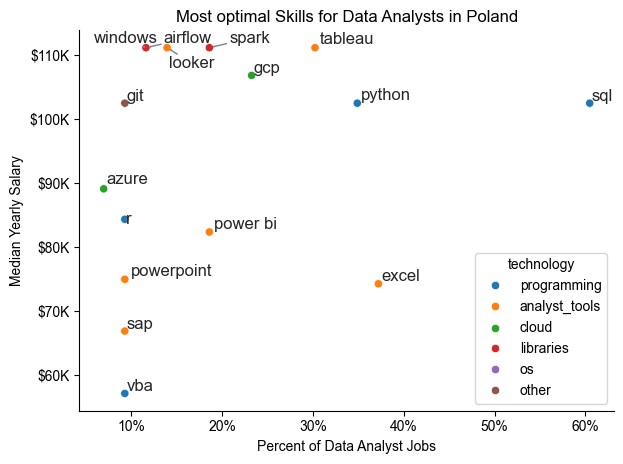

In [41]:
# df_plot.plot(kind='scatter', x='skill_percent', y='median_salary')
sns.scatterplot(
    data = df_plot,
    x= 'skill_percent',
    y= 'median_salary',
    hue= 'technology'
)

sns.despine()
sns.set_theme(style = 'ticks')

texts = []
for i, txt in enumerate(df_DA_skills_high_demand.index):
    texts.append(plt.text(df_DA_skills_high_demand['skill_percent'].iloc[i], df_DA_skills_high_demand['median_salary'].iloc[i], txt))

#Adjust text to avoid overlap
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='grey'))

plt.xlabel('Percent of Data Analyst Jobs')
plt.ylabel('Median Yearly Salary')
plt.title('Most optimal Skills for Data Analysts in Poland')

from matplotlib.ticker import PercentFormatter
ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K'))
ax.xaxis.set_major_formatter(PercentFormatter(decimals=0))
plt.tight_layout()
plt.show()